### importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


###  creating a DataFrame in Pandas to simulate vehicle movement data

In [2]:
data = {
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'event': ['entry'] * 50 + ['exit'] * 50,
    'parking_lot': ['A'] * 25 + ['B'] * 25 + ['A'] * 25 + ['B'] * 25
}
df = pd.DataFrame(data)

###  extracting the date

In [3]:
df['date'] = df['timestamp'].dt.date

### creating a histogram to visualize the distribution of vehicle entry and exit events over time using Matplotlib and Seaborn

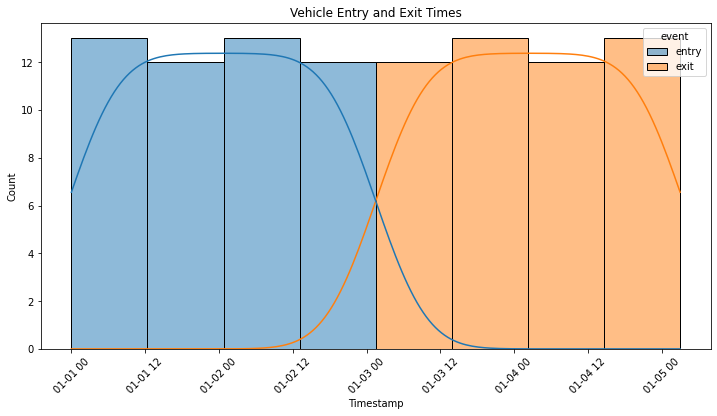

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='timestamp', hue='event', kde=True)
plt.title('Vehicle Entry and Exit Times')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### calculating the cumulative occupancy of parking lots over time

In [5]:
occupancy = df.groupby(['date', 'parking_lot', 'event']).size().unstack(fill_value=0)
occupancy['net_movement'] = occupancy['entry'] - occupancy['exit']
occupancy = occupancy.groupby('parking_lot')['net_movement'].cumsum().reset_index()

### visualizing the trends in parking lot occupancy over time using a line plot with Seaborn

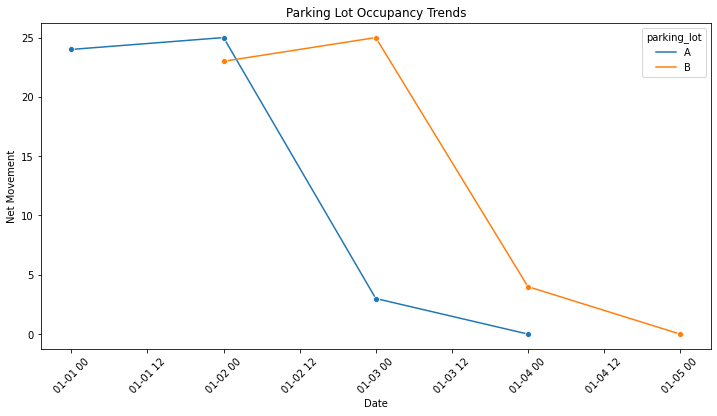

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=occupancy, x='date', y='net_movement', hue='parking_lot', marker='o')
plt.title('Parking Lot Occupancy Trends')
plt.xlabel('Date')
plt.ylabel('Net Movement')
plt.xticks(rotation=45)
plt.show()